# GDP Data Tutorial: Using the FRED API with Python

## Downloading Macroeconomic Data using FRED

In this tutorial we will download macroeconomic data from Federal Reserve Economic Data (FRED).  The FRED database contains frequently updated macro data from various sources---most of which are US government agencies.  You can peruse data on their website (https://fred.stlouisfed.org/) and search for specific data series.  However, in this tutorial I'll show how to access data from their servers directly using an API (application programming interface).  

Let's work within Python and use the package `fredapi`  (https://fred.stlouisfed.org/docs/api/fred/) which makes use of `pandas` and returns FRED data to you in a `DataFrame`.  A `DataFrame` is a structure that contains two-dimensional data and its corresponding labels.  So basically a table.  You can see how to work with `DataFrame` here: https://realpython.com/pandas-dataframe/.  Playing with `DataFrame` is only useful after you successfully pull the data from FRED and want to view/query/manipulate the resulting table of data.

From a Python terminal (in VSCode, Jupyter, etc.) run:

```python

pip install fredapi

```

This installs the necessary Python package to contact the FRED servers directly and download data.  

## Pulling data

First, get an API key from FRED (https://fred.stlouisfed.org/docs/api/api_key.html). This allows you to access `fredapi` to pull data.    One you have your API key, create a new Python code file (in VSCode, Jupyter, etc) use this code to pass the API key directly to FRED.

In [1]:
from fredapi import Fred

fred = Fred(api_key='insert api key here')

You can always search for data series on the FRED website https://fred.stlouisfed.org/, but sometimes it is more convenient to search programmatically. `fredapi` provides a `search()` method that does a full-text search and returns a `DataFrame` of results.  For example, suppose that we want to download US GDP data.  Use the search function to find the name of the series:

In [2]:
results = fred.search('GDP')
results

InvalidURL: URL can't contain control characters. '/fred/series/search?search_text=GDP&&api_key=insert api key here' (found at least ' ')

Using the results of the search function, we see that 'GDP' is the series ID for Gross Domestic Product and 'GDPPC1' is the series ID for Real Gross Domestic Product.  Let's download the nominal GDP series.  (Note: There are several options for pulling specific vintages of data.  The details can be found here: https://pypi.org/project/fredapi/.)

In [ ]:
import pandas as pd
from fredapi import Fred
fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')
ngdp = fred.get_series('GDP')

## Describing and visualizing the data

We now have the data series saved to a variable called `ngdp`.  There are some useful commands using `DataFrames` that allows you to view your data series.  The `shape` function returns the size of the data set describing the number of rows and number of columns.  The `ndim` function returns the dimension of your data.  If you want to view the series you assigned to the variable `data`, then you can use the `head()` function, which gives the first (default 5) $n$ rows from a `DataFrame`; or you can use `tail()` function to give the last (default 5) $n$ rows from a `DataFrame`. The `describe()` function returns basic statistics: the value count, mean, standard deviation, minimum, maximum, and 25th, 50th, and 75th quantiles for the data in a column.  (NOTE: Running the Python code in a Jupyter notebook has some advantages if you want a pretty view of a `DataFrame`.  This is done in Jupyter's "DataViewer".)

For example, let's view the most recent quarterly GDP data and compute some descriptive statistics.

In [16]:
ngdp.tail()

2024-04-01    29147.044
2024-07-01    29511.664
2024-10-01    29825.182
2025-01-01    30042.113
2025-04-01    30485.729
dtype: float64

In [17]:
ngdp.describe()

count      314.000000
mean      7600.847631
std       7972.380608
min        243.164000
25%        823.054000
50%       4526.617000
75%      13278.813500
max      30485.729000
dtype: float64

Let's also visualize the data series using the `matplotlib` package.  If it's not already installed, don't forget to do that

```Python

pip install matplotlib

```

You can now use the `.plot()` function to visualize the data.  This function, applied to a `DataFrame` will plot all of the columns with labels.

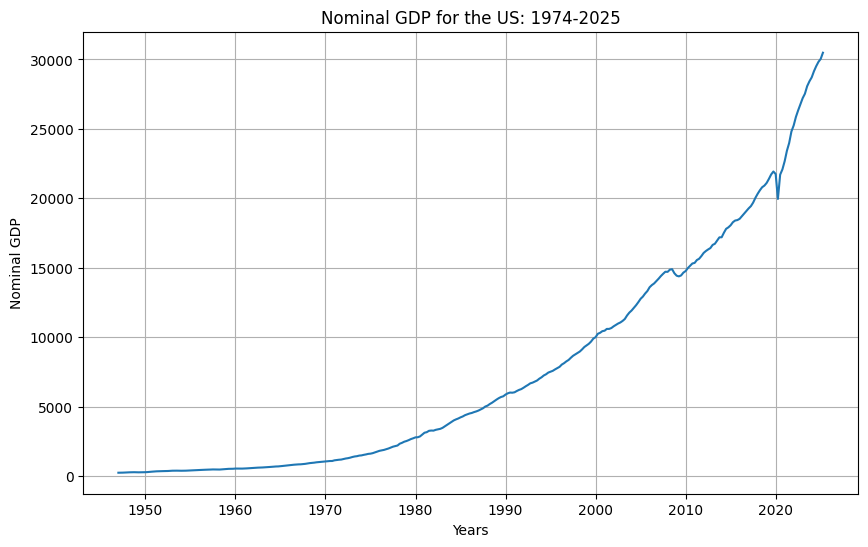

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')
ngdp = fred.get_series('GDP')

# Plot Nominal GDP
plt.figure(figsize=(10, 6))
plt.plot(ngdp, label="Nominal GDP")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Nominal GDP")
plt.title("Nominal GDP for the US: 1974-2025")
plt.grid(True)
plt.show()

A more direct measure of economic prosperity is to measure GDP *per capita*.  Let's find that data series and plot it's trajectory over time.

In [39]:
results = fred.search('real gdp per capita')
results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
A939RX0Q048SBEA,A939RX0Q048SBEA,2025-09-29,2025-09-29,Real gross domestic product per capita,1947-01-01,2025-04-01,Quarterly,Q,Chained 2017 Dollars,Chn. 2017 $,Seasonally Adjusted Annual Rate,SAAR,2025-09-25 07:48:01-05:00,80,BEA Account Code: A939RX For more information...
A229RX0A048NBEA,A229RX0A048NBEA,2025-09-29,2025-09-29,Real Disposable Personal Income: Per Capita,1929-01-01,2024-01-01,Annual,A,Chained 2017 Dollars,Chn. 2017 $,Not Seasonally Adjusted,NSA,2025-09-25 07:47:11-05:00,35,BEA Account Code: A229RX For more information...
A229RX0Q048SBEA,A229RX0Q048SBEA,2025-09-29,2025-09-29,Real Disposable Personal Income: Per Capita,1947-01-01,2025-04-01,Quarterly,Q,Chained 2017 Dollars,Chn. 2017 $,Seasonally Adjusted Annual Rate,SAAR,2025-09-25 07:48:19-05:00,28,BEA Account Code: A229RX For more information...
NYGDPPCAPKDUSA,NYGDPPCAPKDUSA,2025-09-29,2025-09-29,Constant GDP per capita for the United States,1960-01-01,2024-01-01,Annual,A,2010 U.S. Dollars,2010 U.S. $,Not Seasonally Adjusted,NSA,2025-07-02 13:56:02-05:00,54,GDP per capita is gross domestic product divid...
NYGDPPCAPKDJPN,NYGDPPCAPKDJPN,2025-09-29,2025-09-29,Constant GDP per capita for Japan,1960-01-01,2024-01-01,Annual,A,2010 U.S. Dollars,2010 U.S. $,Not Seasonally Adjusted,NSA,2025-07-02 13:56:03-05:00,50,GDP per capita is gross domestic product divid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KIPPPGPAA156NUPN,KIPPPGPAA156NUPN,2025-09-29,2025-09-29,Investment Share of Purchasing Power Parity Co...,1950-01-01,2010-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2012-09-17 11:22:31-05:00,1,For more information and proper citation see h...
KIPPPGMAA156NUPN,KIPPPGMAA156NUPN,2025-09-29,2025-09-29,Investment Share of Purchasing Power Parity Co...,1950-01-01,2010-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2012-09-17 10:43:16-05:00,1,For more information and proper citation see h...
KCPPPGGYA156NUPN,KCPPPGGYA156NUPN,2025-09-29,2025-09-29,Consumption Share of Purchasing Power Parity C...,1970-01-01,2010-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2012-09-17 10:11:58-05:00,1,For more information and proper citation see h...


Our search results show that 'NYGDPPCAPKDUSA' is the series ID for real GDP measured in 2010 U.S. Dollars.  We can also see that FRED provides data on GDP per capita for other countries as well.  Let's download and plot GDP per capita for different countries to measure long-run differences in economic prosperity.

In [ ]:
gdp_pp_usa=fred.get_series('NYGDPPCAPKDUSA')
gdp_pp_chn=fred.get_series('NYGDPPCAPKDCHN')
gdp_pp_jpn=fred.get_series('NYGDPPCAPKDJPN')
gdp_pp_gbr=fred.get_series('NYGDPPCAPKDGBR')
gdp_pp_deu=fred.get_series('NYGDPPCAPKDDEU')
gdp_pp_mex=fred.get_series('NYGDPPCAPKDMEX')
gdp_pp_bgd=fred.get_series('NYGDPPCAPKDBGD')

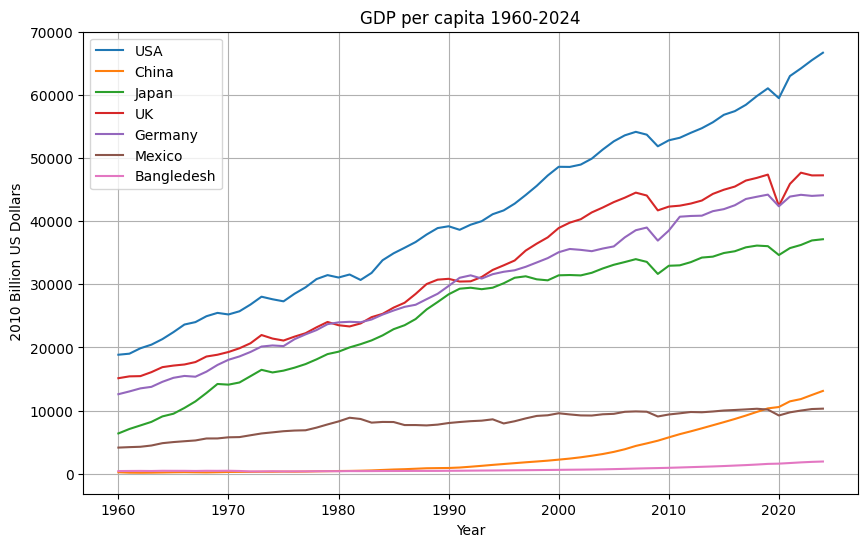

In [37]:
# Plot per capita GDP for various countries
plt.figure(figsize=(10, 6))

plt.plot(gdp_pp_usa, label="USA")
plt.plot(gdp_pp_chn, label="China")
plt.plot(gdp_pp_jpn, label="Japan")
plt.plot(gdp_pp_gbr, label="UK")
plt.plot(gdp_pp_deu, label="Germany")
plt.plot(gdp_pp_mex, label="Mexico")
plt.plot(gdp_pp_bgd, label="Bangledesh")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel(" 2010 Billion US Dollars")
plt.title("GDP per capita 1960-2024")
plt.legend()
plt.grid(True)
plt.show()